In [170]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [171]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from utils import get_trial_dataframe
from utils import get_trial_paths
from utils import analysis_pipeline

In [172]:
# Replace with the path to the logs directory in multi-memory-task
#logs_path = '/Users/isabella/multi-memory-task/logs'
logs_path = 'C:\\Users\\isami\\Dropbox\\multi-memory' 

# Replace this with the name of the dataset directories
datasets = ["2023_07_21_13_34_06",
"2023_07_21_14_55_35",
"2023_07_21_15_11_12",
"2023_07_21_11_12_44",
"2023_07_21_11_44_25",
"2023_07_21_13_13_03",
"2023_07_25_16_46_31",
"2023_07_26_08_45_28",
"2023_07_26_09_28_32",
"2023_07_26_08_59_34",
"2023_07_26_09_07_21",
"2023_07_25_09_06_21",
"2023_07_25_09_15_18",
"2023_07_25_09_32_48",
"2023_07_25_09_44_59",
"2023_07_25_16_23_43",
"2023_07_26_12_36_06",
"2023_07_26_12_48_42",
"2023_07_26_12_30_31"]

trial_paths = get_trial_paths.get_trial_paths(logs_path=logs_path, datasets=datasets)
df = get_trial_dataframe.get_trial_dataframe(trial_paths=trial_paths)

Number of trials:  2799


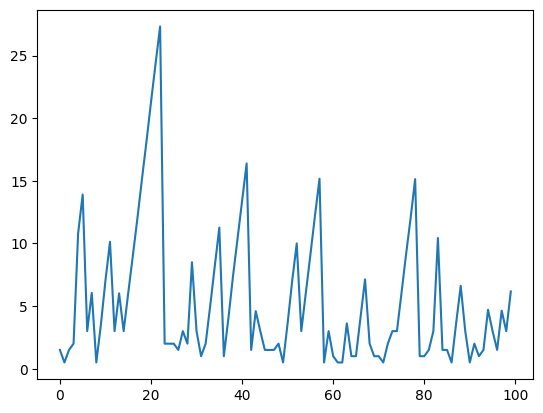

In [173]:
plt.plot(df.long_delay_s.iloc[:100])
# y_s', 'visible_time']]

In [174]:
df = df[df['fixed'] == True]
df = df[df['visible'] == 0]

In [195]:
df

,trial_num,time,block_id,visible,fixed,ltm,object_0_x,object_0_y,object_0_id,object_0_theta,...,delay_s,last_vis_time,long_delay_s,long_visible_s,precision_difference_0,precision_difference_0_abs,rounded_long_delay_s,delay_bins,rounded_long_visible_s,visible_bins
4,477,1.689967e+09,000000,0,True,True,0.274838,0.698248,000604,-0.848879,...,0.031194,1.689967e+09,10.783591,5.499666,-0.052033,0.052033,10.8,11.0,5.5,11.2
5,478,1.689967e+09,000000,0,True,True,0.274838,0.698248,000604,-0.848879,...,0.033546,1.689967e+09,13.900068,5.499666,-0.076539,0.076539,13.9,21.1,5.5,11.2
7,480,1.689967e+09,000000,0,True,True,0.215732,0.404128,000941,-1.896076,...,0.033047,1.689967e+09,6.049139,6.000503,-0.017996,0.017996,6.0,6.2,6.0,11.2
9,482,1.689967e+09,000000,0,True,True,0.215732,0.404128,000941,-1.896076,...,0.034990,1.689967e+09,3.517156,8.000054,0.210077,0.210077,3.5,6.2,8.0,11.2
10,483,1.689967e+09,000000,0,True,True,0.274838,0.698248,000604,-0.848879,...,0.032738,1.689967e+09,7.031522,8.000054,0.054889,0.054889,7.0,11.0,8.0,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,1801,1.690377e+09,000969,0,True,True,0.321871,0.741392,000346,-0.635727,...,0.034029,1.690377e+09,20.083252,14.997432,0.112633,0.112633,20.1,21.1,15.0,17.0
2242,1802,1.690377e+09,000969,0,True,True,0.321871,0.741392,000346,-0.635727,...,0.032282,1.690377e+09,23.215851,14.997432,0.009480,0.009480,23.2,98.6,15.0,17.0
2243,1803,1.690377e+09,000969,0,True,True,0.321871,0.741392,000346,-0.635727,...,0.033158,1.690377e+09,26.383072,14.997432,0.071692,0.071692,26.4,98.6,15.0,17.0
2244,1804,1.690377e+09,000969,0,True,True,0.798116,0.533568,000566,1.458668,...,0.033318,1.690377e+09,29.749629,14.997432,0.016524,0.016524,29.7,98.6,15.0,17.0


In [175]:
len(df)

1315

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Delay Time Effect on vLTM')

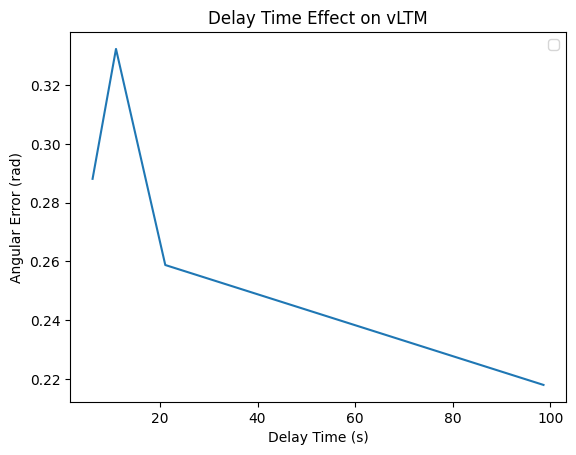

In [190]:
precision_difference_arr = []

for (row_index,row_data) in df.iterrows():
    precision_difference_arr.append(analysis_pipeline.find_angular_dist(row_data['object_0_theta'],row_data['response_theta']))

df['precision_difference_0'] = precision_difference_arr
df['precision_difference_0_abs'] = df['precision_difference_0'].abs()

ylabel = 'Angular Distance from Target (rad)'

analysis_pipeline.round('long_delay_s',df)
_,bins = pd.qcut(df['rounded_long_delay_s'],4,duplicates='drop', retbins=True)
df['delay_bins'] = pd.qcut(df['rounded_long_delay_s'], q=4, labels=np.round(bins[1:], 1))
fig,ax = plt.subplots()
ax.plot(df.groupby('delay_bins').precision_difference_0_abs.mean())
plt.legend()
plt.xlabel('Delay Time (s)')
plt.ylabel('Angular Error (rad)')
plt.title('Delay Time Effect on vLTM')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Delay Time Effect on vLTM')

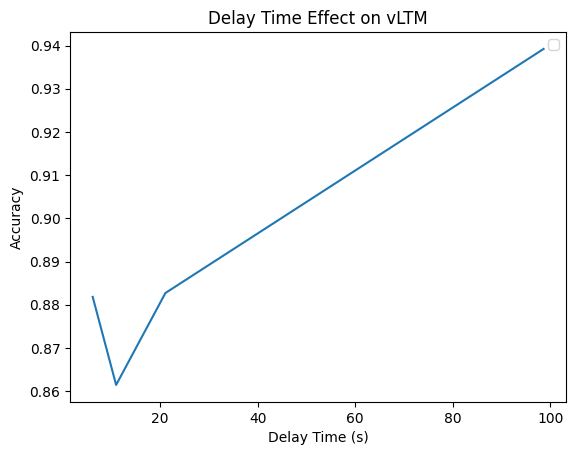

In [191]:
fig,ax = plt.subplots()
ax.plot(df.groupby('delay_bins').correct.mean())
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Delay Time (s)')
plt.title('Delay Time Effect on vLTM')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Encoding Time Effect on vLTM')

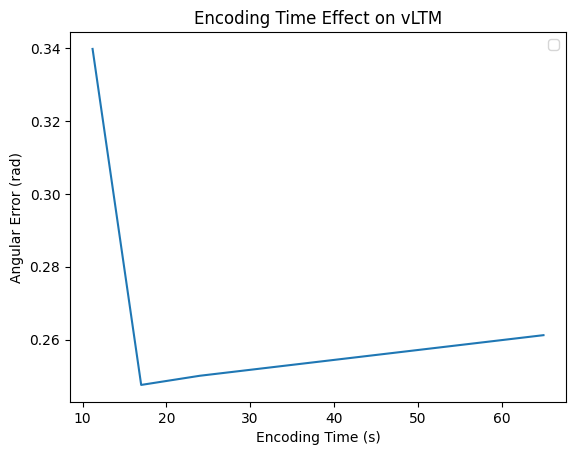

In [193]:
analysis_pipeline.round('long_visible_s',df)
_,bins = pd.qcut(df['rounded_long_visible_s'],4,duplicates='drop', retbins=True)
df['visible_bins'] = pd.qcut(df['rounded_long_visible_s'], q=4, labels=np.round(bins[1:], 1))
fig,ax = plt.subplots()
ax.plot(df.groupby('visible_bins').precision_difference_0_abs.mean())
plt.legend()
plt.xlabel('Encoding Time (s)')
plt.ylabel('Angular Error (rad)')
plt.title('Encoding Time Effect on vLTM')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Encoding Time Effect on vLTM')

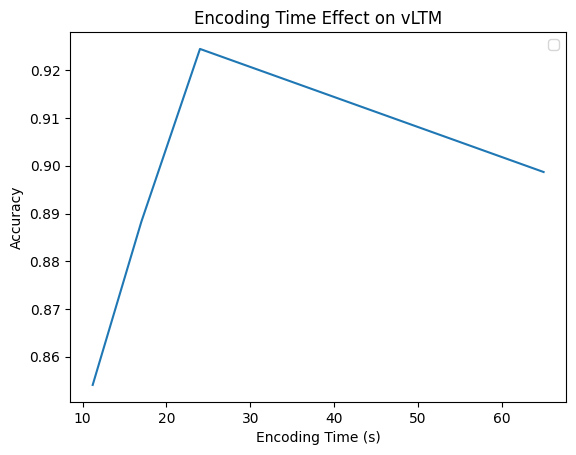

In [194]:
fig,ax = plt.subplots()
ax.plot(df.groupby('visible_bins').correct.mean())
plt.legend()
plt.xlabel('Encoding Time (s)')
plt.ylabel('Accuracy')
plt.title('Encoding Time Effect on vLTM')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Set Size Effect on vLTM')

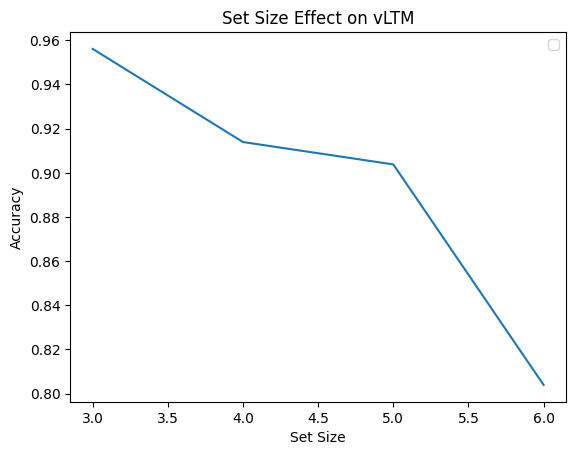

In [180]:
fig,ax = plt.subplots()
ax.plot(df.groupby('num_object').correct.mean())
plt.legend()
plt.xlabel('Set Size')
plt.ylabel('Accuracy')
plt.title('Set Size Effect on vLTM')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Set Size Effect on vLTM')

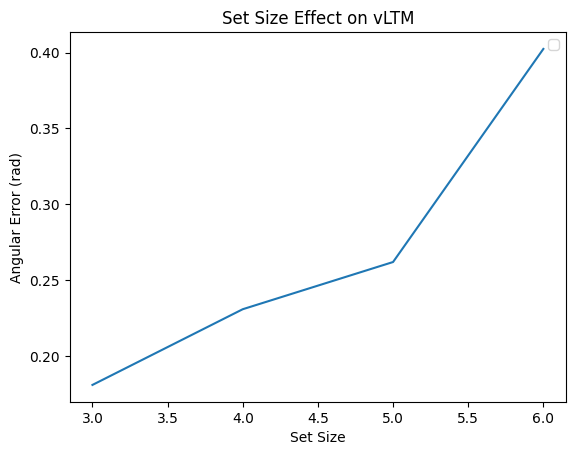

In [181]:
fig,ax = plt.subplots()
ax.plot(df.groupby('num_object').precision_difference_0_abs.mean())
plt.legend()
plt.xlabel('Set Size')
plt.ylabel('Angular Error (rad)')
plt.title('Set Size Effect on vLTM')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Difference in Angular Error from Target (vLTM Incorrect Trials)')

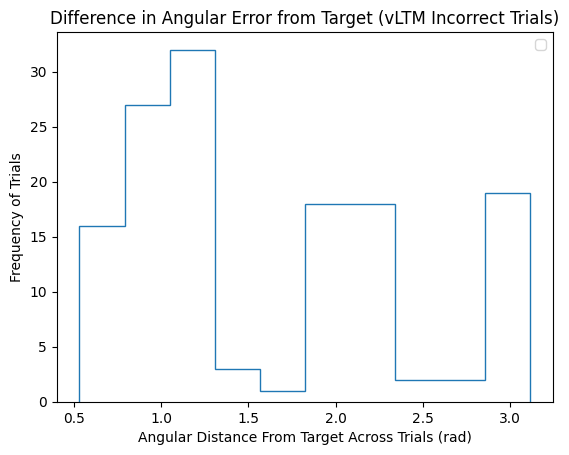

In [182]:
incorrect_df = df[df['correct'] == 0]
fig,ax = plt.subplots()
ax.hist(incorrect_df.precision_difference_0_abs, histtype = 'step')
plt.legend()
plt.xlabel('Angular Distance From Target Across Trials (rad)')
plt.ylabel('Frequency of Trials')
plt.title('Difference in Angular Error from Target (vLTM Incorrect Trials)')

(array([84., 31., 11., 11.,  4.,  1.,  0.,  0.,  0.,  1.]),
 array([ 3.5 , 10.76, 18.02, 25.28, 32.54, 39.8 , 47.06, 54.32, 61.58,
        68.84, 76.1 ]),
 [<matplotlib.patches.Polygon at 0x18ae1017450>])

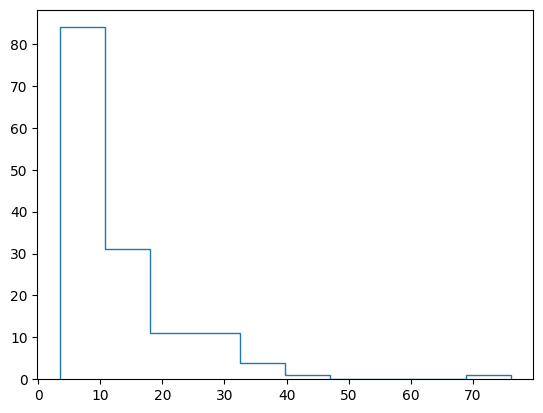

In [183]:
fig,ax = plt.subplots()
ax.hist(incorrect_df.rounded_long_delay_s, histtype = 'step')

Text(0.5, 1.0, 'Difference in Angular Error from Target (vLTM Incorrect Trials)')

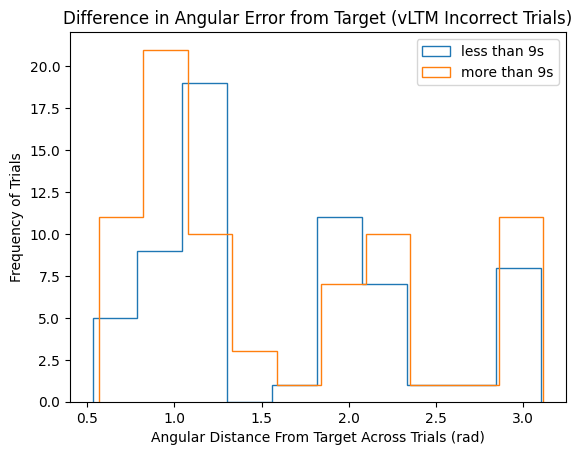

In [184]:
incorrect_df_delay1 = incorrect_df[incorrect_df['rounded_long_delay_s'] <= 9]
incorrect_df_delay2 = incorrect_df[incorrect_df['rounded_long_delay_s'] > 9]
fig,ax = plt.subplots()
ax.hist(incorrect_df_delay1.precision_difference_0_abs, histtype = 'step', label='less than 9s')
ax.hist(incorrect_df_delay2.precision_difference_0_abs, histtype = 'step', label= 'more than 9s')
plt.legend()
plt.xlabel('Angular Distance From Target Across Trials (rad)')
plt.ylabel('Frequency of Trials')
plt.title('Difference in Angular Error from Target (vLTM Incorrect Trials)')

In [185]:
df.columns

Index(['trial_num', 'time', 'block_id', 'visible', 'fixed', 'ltm',
       'object_0_x', 'object_0_y', 'object_0_id', 'object_0_theta',
       'object_1_x', 'object_1_y', 'object_1_id', 'object_1_theta',
       'object_2_x', 'object_2_y', 'object_2_id', 'object_2_theta',
       'object_3_x', 'object_3_y', 'object_3_id', 'object_3_theta',
       'object_4_x', 'object_4_y', 'object_4_id', 'object_4_theta',
       'object_5_x', 'object_5_y', 'object_5_id', 'object_5_theta',
       'target_id', 'target_x', 'target_y', 'target_theta', 'num_object',
       'response_object_ind', 'response_x', 'response_id', 'response_theta',
       'correct', 'reaction_time_steps', 'response_y', 'visible_s', 'delay_s',
       'last_vis_time', 'long_delay_s', 'long_visible_s',
       'precision_difference_0', 'precision_difference_0_abs',
       'rounded_long_delay_s', 'delay_bins', 'rounded_long_visible_s',
       'visible_bins'],
      dtype='object')

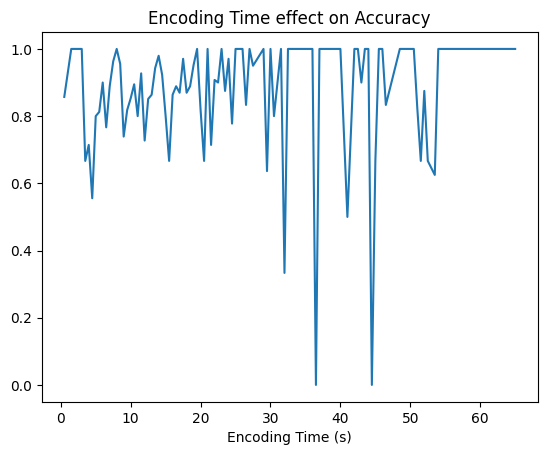

In [186]:
analysis_pipeline.round("long_visible_s",df)
analysis_pipeline.plot_accuracy("rounded_long_visible_s", df, "Encoding Time (s)", "Encoding Time effect on Accuracy")

In [187]:
analysis_pipeline.plot_error("rounded_visible_s", df, "Encoding Time (s)", "Encoding Time effect on Error")

KeyError: 'rounded_visible_s'

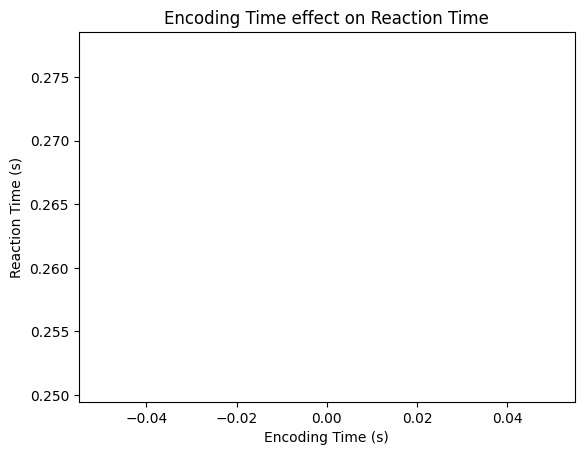

In [ ]:
analysis_pipeline.plot_rt("rounded_visible_s", df, "Encoding Time (s)", "Encoding Time effect on Reaction Time")

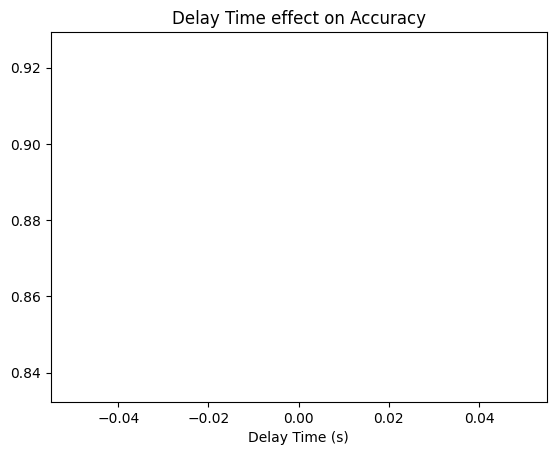

In [ ]:
analysis_pipeline.round("delay_s",df)
analysis_pipeline.plot_accuracy("rounded_delay_s", df, "Delay Time (s)", "Delay Time effect on Accuracy")

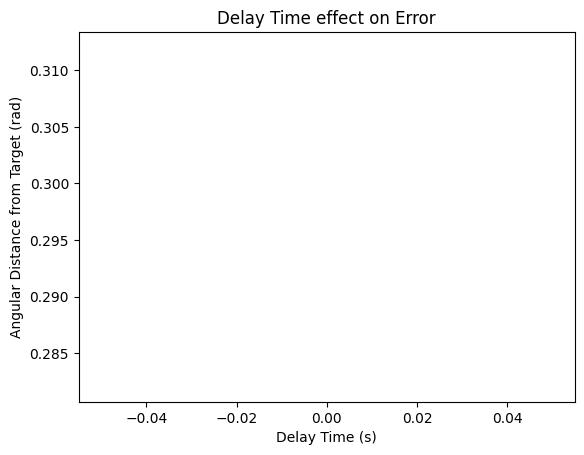

In [ ]:
analysis_pipeline.plot_error("rounded_delay_s", df, "Delay Time (s)", "Delay Time effect on Error")

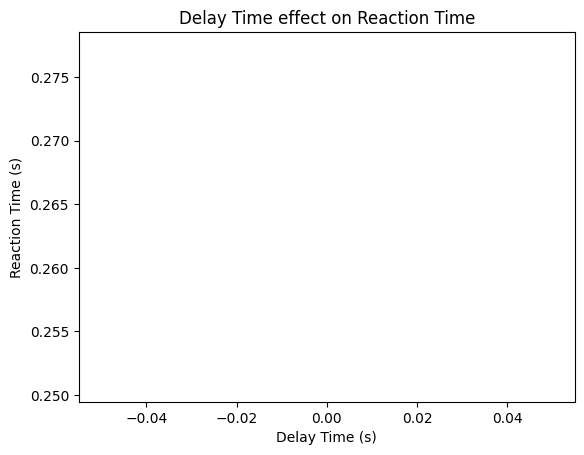

In [ ]:
analysis_pipeline.plot_rt("rounded_delay_s", df, "Delay Time (s)", "Delay Time effect on Reaction Time")

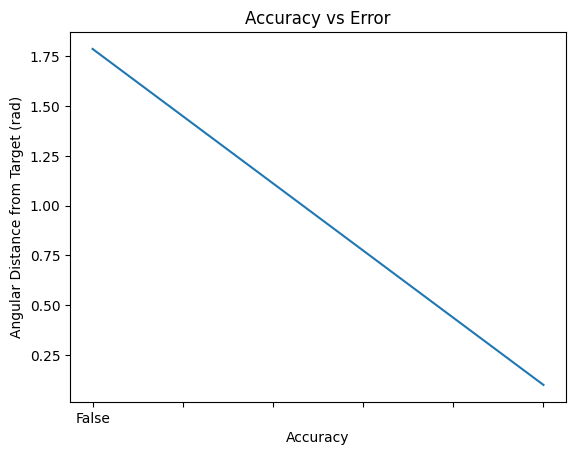

In [ ]:
analysis_pipeline.plot_error("correct", df, "Accuracy", "Accuracy vs Error")

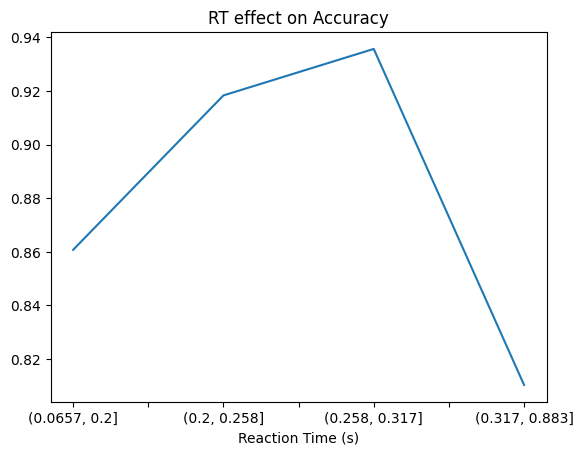

In [ ]:
analysis_pipeline.plot_accuracy(pd.qcut(df['reaction_time_s'],4),df,'Reaction Time (s)', 'RT effect on Accuracy')


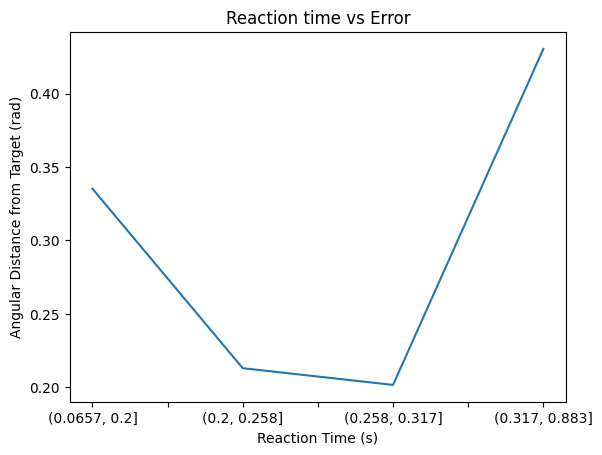

In [ ]:
analysis_pipeline.plot_error(pd.qcut(df['reaction_time_s'],4),df,'Reaction Time (s)', 'Reaction time vs Error')

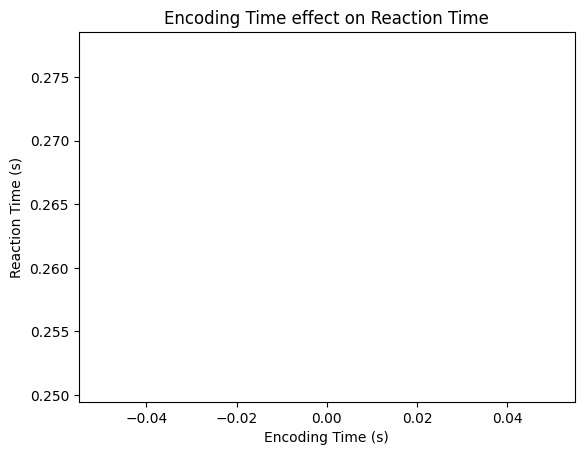

In [ ]:
analysis_pipeline.plot_rt("rounded_visible_s", df, "Encoding Time (s)", "Encoding Time effect on Reaction Time")

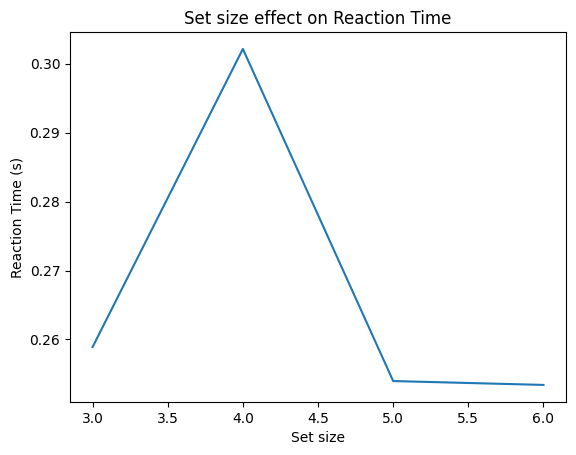

In [ ]:
analysis_pipeline.plot_rt("num_object", df, "Set size", "Set size effect on Reaction Time")

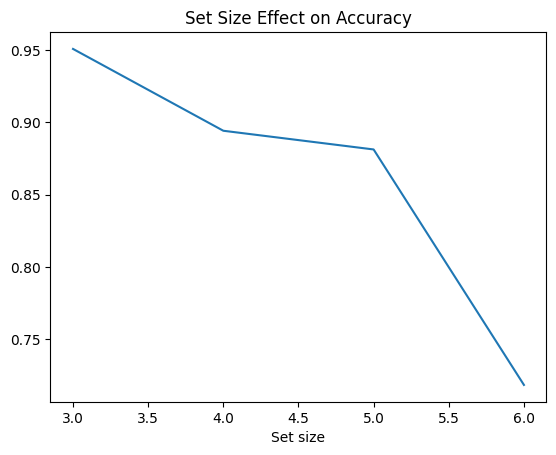

In [ ]:
analysis_pipeline.plot_accuracy('num_object',df, 'Set size','Set Size Effect on Accuracy')

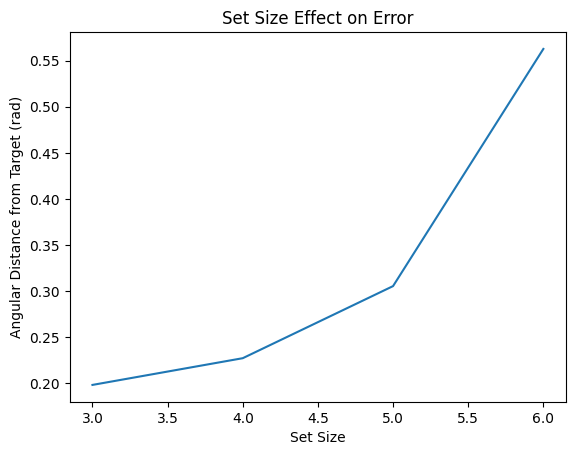

In [ ]:
analysis_pipeline.plot_error('num_object', df, 'Set Size', 'Set Size Effect on Error')

In [ ]:
df.columns

Index(['trial_num', 'time', 'block_id', 'visible', 'fixed', 'ltm',
       'object_0_x', 'object_0_y', 'object_0_id', 'object_0_theta',
       'object_1_x', 'object_1_y', 'object_1_id', 'object_1_theta',
       'object_2_x', 'object_2_y', 'object_2_id', 'object_2_theta',
       'object_3_x', 'object_3_y', 'object_3_id', 'object_3_theta',
       'object_4_x', 'object_4_y', 'object_4_id', 'object_4_theta',
       'object_5_x', 'object_5_y', 'object_5_id', 'object_5_theta',
       'target_id', 'target_x', 'target_y', 'target_theta', 'num_object',
       'response_object_ind', 'response_x', 'response_id', 'response_theta',
       'correct', 'reaction_time_steps', 'response_y', 'visible_s', 'delay_s',
       'last_vis_time', 'long_delay_s', 'long_visible_s',
       'precision_difference_0', 'precision_difference_0_abs',
       'rounded_delay_s', 'rounded_visible_s', 'rounded_long_visible_s',
       'reaction_time_s'],
      dtype='object')

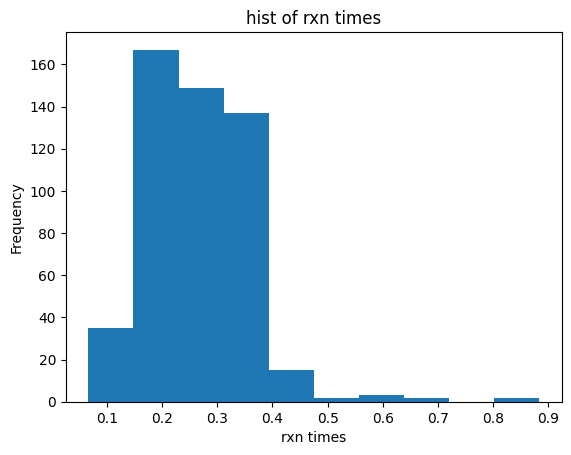

In [ ]:
analysis_pipeline.plot_hist('reaction_time_s',df,'rxn times','hist of rxn times')

0.26399739583333337
0.0941968810306439


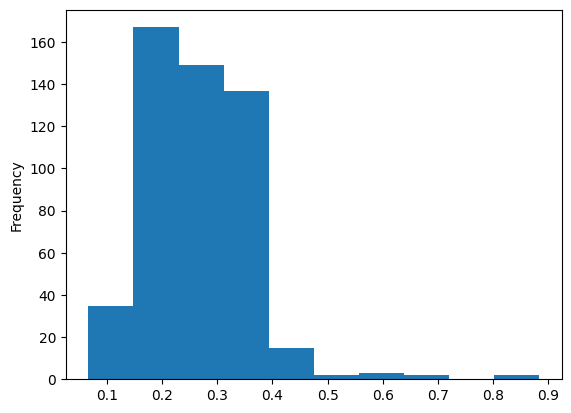

In [ ]:
new_df = np.clip(df['reaction_time_s'],0,15)
new_df.plot(kind='hist')
print(new_df.mean())
print(new_df.std())